In [ ]:
# default_exp chem

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#export
def ChemSimulation(eqnstr,verbose=True,**kwargs):
    from pyndamics3 import Simulation
    lines=eqnstr.strip().split('\n')
    
    components=set([])
    parameters=set([])
    for line in lines:
        lhs=[_.strip() for _ in line.split('--')[0].strip().split('+')]
        rhs=[_.strip() for _ in line.split('->')[-1].strip().split('+')]
        middle=line.split('--')[1].lstrip('\t ->').split('->')[0].rstrip('\t ->')

        components=components.union(set(lhs+rhs))
        parameters=parameters.union([middle])
        
        if verbose:
            print(lhs,middle,rhs)
        
        
    components=sorted(components)
    parameters=sorted(parameters)
    
    if verbose:
        print("Components",components)
        print("Parameters",parameters)
    
    
    diffeqs=[]
    for c in components:
        
        if c=='ϕ':
            continue
        
        eqn="%s' = " % c

        for line in lines:
            lhs=[_.strip() for _ in line.split('--')[0].strip().split('+')]
            rhs=[_.strip() for _ in line.split('->')[-1].strip().split('+')]
            middle=line.split('--')[1].lstrip('\t ->').split('->')[0].rstrip('\t ->')


            sign='0'
            if c in lhs:
                sign='-'
                if len(rhs)>1:
                    sign+='%d*' % len(rhs)


            if c in rhs:
                sign='+'
                if len(lhs)>1:
                    sign+='%d*' % len(lhs)

            if sign=='0':
                continue
                
            if c in rhs and c in lhs:  # A -> A +B doesn't change A
                continue

            plhs='*'.join(lhs)

            eqn+=f" {sign}{middle}*{plhs}"

        if eqn=="%s' = " % c:
            eqn="%s' = 0" % c
            
        diffeqs.append(eqn)  
        
    if verbose:
        print("diffeqs",diffeqs)
        
    sim=Simulation()
        
    for c,d in zip(components,diffeqs):
        if not c in kwargs:
            c0=0
        else:
            c0=kwargs[c]
            
            
        sim.add(d,c0)
        
    for p in parameters:
        if p in kwargs:
            sim.params(**{p:kwargs[p]})
        
    return sim

In [ ]:
sim=ChemSimulation(
"""
D --k1--> D+M
M --k2--> M+P
M --k3--> ϕ
P --k4--> ϕ
""",D=1,M=0,ϕ=0,P=0,k1=.01,k3=0.00577,k4=0.0001925,k2=20*0.00577)

['D'] k1 ['D', 'M']
['M'] k2 ['M', 'P']
['M'] k3 ['ϕ']
['P'] k4 ['ϕ']
Components ['D', 'M', 'P', 'ϕ']
Parameters ['k1', 'k2', 'k3', 'k4']
diffeqs ["D' = 0", "M' =  +k1*D -k3*M", "P' =  +k2*M -k4*P"]


In [ ]:
sim=ChemSimulation("""
A   -->k1->   B
B   -->k_1->  A
A+B -->k2->   C
C   -->k_2->  A+B
""",A=1,B=1,C=0,k1=1,k_1=2,k2=3,k_2=4)

print()

print(sim.equations())

['A'] k1 ['B']
['B'] k_1 ['A']
['A', 'B'] k2 ['C']
['C'] k_2 ['A', 'B']
Components ['A', 'B', 'C']
Parameters ['k1', 'k2', 'k_1', 'k_2']
diffeqs ["A' =  -k1*A +k_1*B -k2*A*B +k_2*C", "B' =  +k1*A -k_1*B -k2*A*B +k_2*C", "C' =  +2*k2*A*B -2*k_2*C"]

A'=-k1*A +k_1*B -k2*A*B +k_2*C
B'=+k1*A -k_1*B -k2*A*B +k_2*C
C'=+2*k2*A*B -2*k_2*C
k1=1
k2=3
k_1=2
k_2=4



In [ ]:
sim.params()

In [ ]:
assert sim.equations()=="""
A'=-k1*A +k_1*B -k2*A*B +k_2*C
B'=+k1*A -k_1*B -k2*A*B +k_2*C
C'=+2*k2*A*B -2*k_2*C
k1=1
k2=3
k_1=2
k_2=4
""".lstrip()

In [ ]:
for c in sim.components:
    c.plot=1

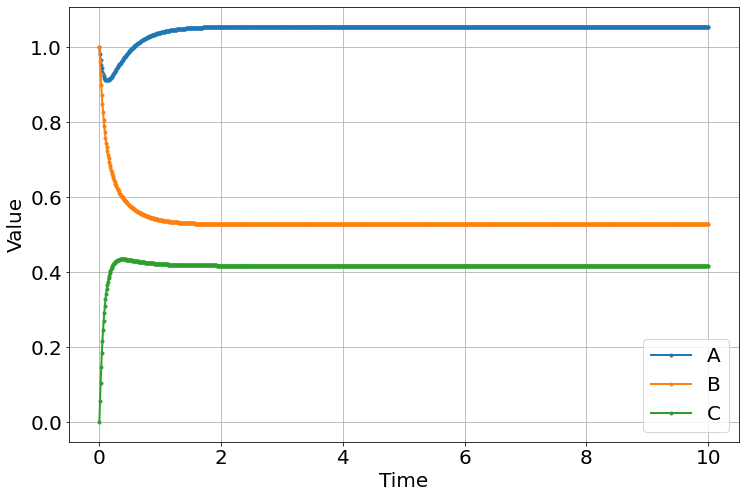

<Figure size 864x576 with 0 Axes>

In [ ]:
sim.run(10)

In [ ]:
sim=ChemSimulation(
"""
D --k1--> D+M
M --k2--> M+P
M --k3--> ϕ
P --k4--> ϕ
""",D=1,M=0,ϕ=0,P=0,k1=.01,k3=0.00577,k4=0.0001925,k2=20*0.00577)

['D'] k1 ['D', 'M']
['M'] k2 ['M', 'P']
['M'] k3 ['ϕ']
['P'] k4 ['ϕ']


In [ ]:
print(sim.equations())

D'=0
M'=+k1*D -k3*M
P'=+k2*M -k4*P
k1=0.01
k2=0.1154
k3=0.00577
k4=0.0001925

